In [2]:
import os
import mediapipe as mp

In [3]:
# from 'data' directory retrieve 'A' folder which contains images
# and 'B' folder which contains images
# we will use these images to train the model

data_dir = os.path.join(os.getcwd(), 'data')

data_A = os.path.join(data_dir, 'A')

data_B = os.path.join(data_dir, 'B')

# create a list of all the images in the 'A' folder
images_A = [os.path.join(data_A, f) for f in os.listdir(data_A) if os.path.isfile(os.path.join(data_A, f))]
# create a list of all the images in the 'B' folder
images_B = [os.path.join(data_B, f) for f in os.listdir(data_B) if os.path.isfile(os.path.join(data_B, f))]

(300, 300, 3)


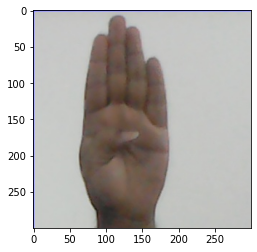

In [22]:
import matplotlib.pyplot as plt
import cv2

# load the first image from the list
image = cv2.imread(images_B[0])


# convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
# display the image
plt.imshow(image)


In [ ]:
import mediapipe as mp

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

def detect_hand(image):
    mpHands = mp.solutions.hands
    mpDraw = mp.solutions.drawing_utils
    hands = mpHands.Hands(static_image_mode=True)
  
    results = hands.process(image)

    if not results.multi_hand_landmarks:
        print("not working")
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            print(hand_landmarks)
            mpDraw.draw_landmarks(image, hand_landmarks, mpHands.HAND_CONNECTIONS)
            mp.solutions.drawing_utils.draw_landmarks(image, hand_landmarks, mpHands.HAND_CONNECTIONS)

            plt.imshow(image)


detect_hand(image)

# for im in images_B:
#     image = cv2.imread(im)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

#     detect_hand(image)
    

# get_hand_landmarks(image)

In [47]:
def process_files(files):
    mpHands = mp.solutions.hands
    mp_hands = mpHands.Hands(static_image_mode=True)
    mpDraw = mp.solutions.drawing_utils
    for idx, file in enumerate(files):
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = mp_hands.process(image)
        if results.multi_hand_landmarks:
            for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                print(f'Hand number: {hand_no + 1}: {hand_landmarks}')
                print("----------------------------------")
                for i in range(2):
                    print(f'{mp_hands.HandLandmark(i).name}:')
                    print(f'Landmark {i}: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')
                return hand_landmarks
            


In [15]:
process_files(images_A[0])

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [41]:
mpHands = mp.solutions.hands
mp_hands = mpHands.Hands(static_image_mode=True)
mpDraw = mp.solutions.drawing_utils

im = cv2.imread(images_B[3])

result = mp_hands.process(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

print(result.multi_handedness)


[classification {
  index: 1
  score: 0.9848111271858215
  label: "Right"
}
]


IndexError: list index out of range